In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("C:/Users/yeolume/source/data/credit-a.csv",header=None)

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0,21.08,10.085,1,1,11,1,1.25,1,1,0,1,0,260,0.0,1
649,1,22.67,0.750,0,0,0,0,2.00,1,0,2,0,0,200,394.0,1
650,1,25.25,13.500,1,1,13,7,2.00,1,0,1,0,0,200,1.0,1
651,0,17.92,0.205,0,0,12,0,0.04,1,1,0,1,0,280,750.0,1


In [6]:
data.iloc[:,-1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [7]:
x=data.iloc[:,:-1]#选择所有行，0到倒数第二列
y=data.iloc[:,-1].replace(-1,0)#选择所有行最后一列，并将-1替换为0

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
648    1
649    1
650    1
651    1
652    1
Name: 15, Length: 653, dtype: int64

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4,input_shape=(15,),activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 64        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89 (356.00 Byte)
Trainable params: 89 (356.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc']
             )

In [17]:
history=model.fit(x,y,epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 72.9913 - acc: 0.3323
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 56.7688 - acc: 0.3277
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 43.0101 - acc: 0.3247
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 26.5540 - acc: 0.3231
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 9.3501 - acc: 0.3400
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 1.2534 - acc: 0.4609
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2925 - acc: 0.5176
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 1.0059 - acc: 0.6815
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7486 - acc: 0.6876
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7109 - acc: 0.6861
Epoch 11/100
21/21 [==============================] - 0

21/21 [==============================] - 0s 2ms/step - loss: 0.4668 - acc: 0.7749
Epoch 88/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4785 - acc: 0.7734
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5431 - acc: 0.7458
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5312 - acc: 0.7534
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5257 - acc: 0.7596
Epoch 92/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4587 - acc: 0.7672
Epoch 93/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4499 - acc: 0.7749
Epoch 94/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4491 - acc: 0.7749
Epoch 95/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4415 - acc: 0.7764
Epoch 96/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4564 - acc: 0.7718
Epoch 97/100
21/21 [==============================] - 0s 3ms/st

In [18]:
history.history.keys()

dict_keys(['loss', 'acc'])

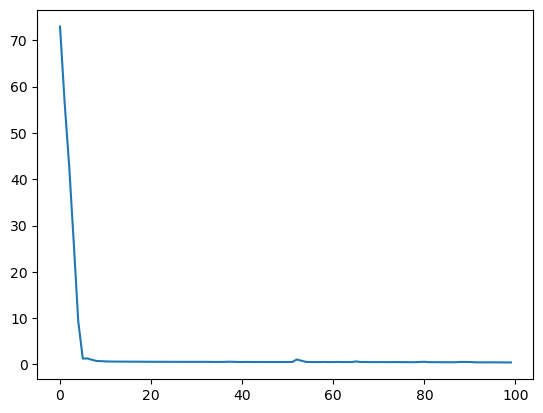

In [19]:
plt.plot(history.epoch,history.history.get('loss'))

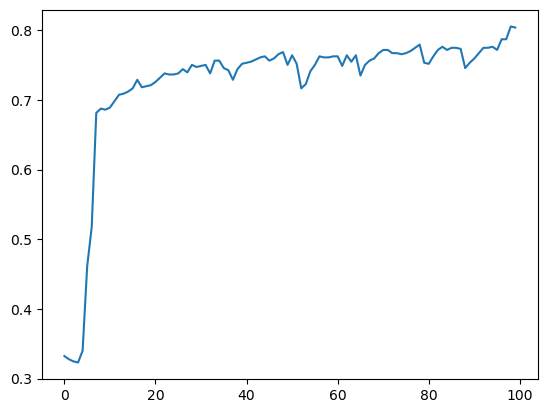

In [20]:
plt.plot(history.epoch,history.history.get('acc'))